# Single Label Multiclass Classification using Reuters Dataset

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print(f"\n\ntrain_data.shape: {train_data.shape}, test_data.shape: {test_data.shape},\ntrain_labels.shape: {train_labels.shape}, test_labels.shape: {test_labels.shape}")

2024-07-06 06:59:10.573201: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-06 06:59:10.575321: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-06 06:59:10.579692: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-06 06:59:10.588821: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-06 06:59:10.607953: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe



train_data.shape: (8982,), test_data.shape: (2246,),
train_labels.shape: (8982,), test_labels.shape: (2246,)


In [2]:
# Decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value)   in word_index.items()]
)
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)

In [3]:
# Encoding the input data
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    num_samples = len(sequences)
    results = np.zeros((num_samples, dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
            
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
# Encoding the labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

### Build more complex neural network than in the imdb example
Data is passed from layer to layer.<br><br>
If the initial layers are too simple, not enough data is passed to the next layers. (aka information bottleneck)<br><br>
The task is more complicated than binary classification, so more units

In [5]:
import keras
from keras import layers

# Build
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax") # total sum == 1
])

In [6]:
# Compiling the model
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [7]:
# Splitting into train and val sets
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, y_val = train_test_split(x_train, y_train, test_size=0.2) # avoid capitalizing Y  

In [8]:
history = model.fit( 
    X_train, 
    Y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_val, y_val),
)

Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4454 - loss: 2.9604 - val_accuracy: 0.6288 - val_loss: 1.6574
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6931 - loss: 1.3975 - val_accuracy: 0.7117 - val_loss: 1.2986
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7716 - loss: 1.0520 - val_accuracy: 0.7385 - val_loss: 1.1666
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8391 - loss: 0.7845 - val_accuracy: 0.7757 - val_loss: 1.0453
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8655 - loss: 0.6292 - val_accuracy: 0.7813 - val_loss: 1.0214
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9042 - loss: 0.4790 - val_accuracy: 0.7902 - val_loss: 0.9844
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9216 - loss: 0.3820 - val_accuracy: 0.7963 - val_loss: 0.9632
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9374 - loss: 0.3015 - val_accuracy: 0.7969 - v

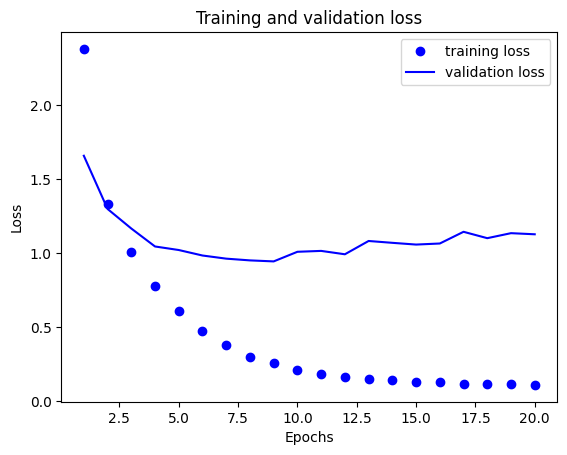

In [9]:
# Plot the history
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="training loss")
plt.plot(epochs, val_loss, "b", label="validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


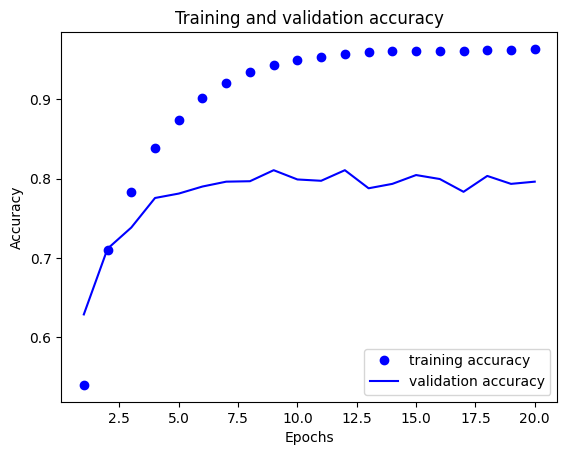

In [10]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="training accuracy")
plt.plot(epochs, val_acc, "b", label="validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [11]:
# Overfitting occurs about after 9 epochs
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

model.fit(
    x_train,
    y_train,
    epochs=9,
    batch_size=256,
)
results = model.evaluate(x_test, y_test)
print("Loss & Accuracy: ", results)

Epoch 1/9
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4888 - loss: 2.6403
Epoch 2/9
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7217 - loss: 1.2480
Epoch 3/9
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7964 - loss: 0.8942
Epoch 4/9
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8496 - loss: 0.6945
Epoch 5/9
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8951 - loss: 0.5142
Epoch 6/9
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9124 - loss: 0.4077
Epoch 7/9
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9336 - loss: 0.3143
Epoch 8/9
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9474 - loss: 0.2486
Epoch 9/9
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9471 - loss: 0.2324
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8098 - loss: 0.9332
Accuracy & Loss:  [0.954059362411499, 0.8005343079566956]


In [12]:
# Make predictions on test data
predictions = model.predict(x_test)
predictions.shape # n_samples x classes

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


(2246, 46)

In [15]:
# How an NN with information bottleneck would perform
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
    ])
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
    )
model.fit(
    X_train,
    Y_train,
    epochs=20,
    batch_size=128,
    validation_data=[X_val, y_val]
    )

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5358 - loss: 2.3818 - val_accuracy: 0.7190 - val_loss: 1.2709
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7590 - loss: 1.0767 - val_accuracy: 0.7524 - val_loss: 1.1370
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8444 - loss: 0.7105 - val_accuracy: 0.7657 - val_loss: 1.0176
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9001 - loss: 0.4620 - val_accuracy: 0.7958 - val_loss: 0.9191
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9374 - loss: 0.3142 - val_accuracy: 0.7980 - val_loss: 0.9324
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9489 - loss: 0.2273 - val_accuracy: 0.8008 - val_loss: 0.9413
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9539 - loss: 0.1980 - val_accuracy: 0.8097 - val_loss: 0.9503
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9575 - loss: 0.1652 - val_accuracy: 0.8086 - v